In [1]:
from model.model import *
from utils.utils import *
from utils.dataset import *
from loss.loss import *

In [45]:
train_data_dir = '/home/zera/test'
label_data_dir = '/home/zera/test_label'
# Specify the paths to your training and label image directories


# Load the data using the load_data function
data_loader = load_data(train_data_dir, label_data_dir)

/home/zera/.local/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [31]:
def get_img(input):
    r1= input[0][:, 0, :, :].unsqueeze(1)
    g1 = input[0][:, 1, :, :].unsqueeze(1)
    b1 = input[1][:, 1, :, :].unsqueeze(1)
    r2 = input[1][:, 0, :, :].unsqueeze(1)    
    g2 = input[2][:, 0, :, :].unsqueeze(1)
    b2 = input[2][:, 1, :, :].unsqueeze(1)

    img1 = torch.cat([r1,g1,b1],dim = 1)
    img2 = torch.cat([r2,g2,b2],dim = 1)

    return img1,img2

In [32]:
l= torch.nn.MSELoss()

In [33]:
def ccn_loss(label_img,output):
    loss_1 = l(output[0],label_img[0])+ l(output[1],label_img[1])+ l(output[2],label_img[2])
    loss_2 =torch.mean(torch.abs(torch.angle(label_img[0]) - torch.angle(output[0])))+torch.mean(torch.abs(torch.angle(label_img[1]) - torch.angle(output[1])))+torch.mean(torch.abs(torch.angle(label_img[2]) - torch.angle(output[2])))
    loss_3 = color_relevance_loss(output,label_img)
            
            
    return loss_1+0.7*loss_2+0.1*loss_3

In [6]:
# def train_CCN(ccn_model,ccn_optimizer,dataloader,epoch=2):
#     for i in range(epoch):
#         loss_ccn = 0
#         loss_mfn = 0
#         loss_den = 0
#         for data in dataloader:

#             input_img,input_label =data
#             ccn_input = preprocess(input_img)
#             ccn_labels = preprocess(input_label)  
            
#             ccn_output = ccn_model(ccn_input)


#             loss_1 = ccn_loss(ccn_labels,ccn_output)
#             ccn_optimizer.zero_grad()
#             loss_1.backward()
#             ccn_optimizer.step()        
#             loss_ccn +=loss_1.item()


#             # im1,im2 = get_img(ccn_output)
            
#             # mfn_input = im1*im2
#             # mfn_output = mfn_model(mfn_input)

#             # mfn_optimizer.zero_grad()
#             # loss_2 = l(mfn_output,input_label)
#             # loss_2.backward(retain_graph=True)
#             # mfn_optimizer.step()
            

            
            
#             # den_inp = arithmetic_mean_filter(mfn_output)
#             # den_output = den_model(den_inp)
            
#             # den_optimzer.zero_grad()
#             # loss_3 = loss_1.get_den_loss(den_output,input_label)           
#             # loss_3.backward(retain_graph=True)
#             # den_optimzer.step()


#             loss_ccn = loss_1.item()
#             # loss_mfn = loss_2.item()
#             # loss_den = loss_3.item()      
            


            
        
#         print(f'Epoch: {i+1} Average DEN loss: {loss_den/len(dataloader)}') 
#         print(f'Epoch: {i+1} Average MFN loss: {loss_mfn/len(dataloader)}')  
#         print(f'Epoch: {i+1} Average CCN loss: {loss_ccn/len(data_loader)}') 
            
            
# ccn = CCN_Model()
# ccn_optim = torch.optim.Adam(ccn.parameters(),lr=0.001)

# train_CCN(ccn,ccn_optim,data_loader,50)

In [7]:
# def train_MFN(mfn_model,mfn_optimizer,dataloader,epoch=2):
#     for i in range(epoch):
#         loss_ccn = 0
#         loss_mfn = 0
#         loss_den = 0
#         for data in dataloader:

#             input_img,input_label =data
#             ccn_input = preprocess(input_img)
#             # ccn_labels = preprocess(input_label)  
            
#             # ccn_output = ccn_model(ccn_input)


#             # loss_1 = ccn_loss(ccn_labels,ccn_output)
#             # ccn_optimizer.zero_grad()
#             # loss_1.backward()
#             # ccn_optimizer.step()        
#             # loss_ccn +=loss_1.item()
#             ccn.eval()
#             with torch.no_grad():
#                 ccn_output = ccn(ccn_input)



#             im1,im2 = get_img(ccn_output)
            
#             mfn_input = im1*im2
#             mfn_output = mfn_model(mfn_input)

#             mfn_optimizer.zero_grad()
#             loss_2 = l(mfn_output,input_label)
#             loss_2.backward(retain_graph=True)
#             mfn_optimizer.step()
            

            
            
#             # den_inp = arithmetic_mean_filter(mfn_output)
#             # den_output = den_model(den_inp)
            
#             # den_optimzer.zero_grad()
#             # loss_3 = loss_1.get_den_loss(den_output,input_label)           
#             # loss_3.backward(retain_graph=True)
#             # den_optimzer.step()


#             #loss_ccn = loss_1.item()
#             loss_mfn = loss_2.item()
#             # loss_den = loss_3.item()      
            


            
        
#         #print(f'Epoch: {i+1} Average DEN loss: {loss_den/len(dataloader)}') 
#         print(f'Epoch: {i+1} Average MFN loss: {loss_mfn/len(dataloader)}')  
#         #print(f'Epoch: {i+1} Average CCN loss: {loss_ccn/len(data_loader)}') 



# mfn = MFN()
# mfn.train()
# mfn_optim = torch.optim.Adam(mfn.parameters(),lr=0.001)
# train_MFN(mfn,mfn_optim,data_loader,50)

In [8]:
# def train_DEN(den_model,den_optimizer,dataloader,epoch=2):
#     loss = DEN_loss()
#     for i in range(epoch):
#         loss_ccn = 0
#         loss_mfn = 0
#         loss_den = 0
#         for data in dataloader:

#             input_img,input_label =data
#             ccn_input = preprocess(input_img)
#             # ccn_labels = preprocess(input_label)  
            
#             # ccn_output = ccn_model(ccn_input)


#             # loss_1 = ccn_loss(ccn_labels,ccn_output)
#             # ccn_optimizer.zero_grad()
#             # loss_1.backward()
#             # ccn_optimizer.step()        
#             # loss_ccn +=loss_1.item()
#             ccn.eval()
#             with torch.no_grad():
#                 ccn_output = ccn(ccn_input)



#             im1,im2 = get_img(ccn_output)            
#             mfn_input = im1*im2

#             mfn.eval()
#             with torch.no_grad():
#                 mfn_output = mfn( mfn_input)
#             # mfn_output = mfn_model(mfn_input)

#             # mfn_optimizer.zero_grad()
#             # loss_2 = l(mfn_output,input_label)
#             # loss_2.backward(retain_graph=True)
#             # mfn_optimizer.step()
            

            
            
#             den_inp = arithmetic_mean_filter(mfn_output)
#             den_output = den_model(den_inp)
            
#             den_optimizer.zero_grad()
#             loss_3 = loss.get_den_loss(den_output,input_label)           
#             loss_3.backward()
#             den_optimizer.step()


#             # loss_ccn = loss_1.item()
#             # loss_mfn = loss_2.item()
#             loss_den = loss_3.item()      
            


            
        
#         #print(f'Epoch: {i+1} Average DEN loss: {loss_den/len(dataloader)}') 
#         print(f'Epoch: {i+1} Average MFN loss: {loss_mfn/len(dataloader)}')  
#         #print(f'Epoch: {i+1} Average CCN loss: {loss_ccn/len(data_loader)}') 
# den = DEN()
# den.train()
# den_optim = torch.optim.Adam(den.parameters(),lr=0.001)
# train_DEN(den,den_optim,data_loader,epoch=2)

In [47]:
import torch
import torch.nn as nn

def get_img(inputs):
    batch_size = inputs[0].size(0)

    r1 = inputs[0][:, 0, :, :].unsqueeze(1)
    g1 = inputs[0][:, 1, :, :].unsqueeze(1)
    b1 = inputs[1][:, 1, :, :].unsqueeze(1)

    r2 = inputs[1][:, 0, :, :].unsqueeze(1)
    g2 = inputs[2][:, 0, :, :].unsqueeze(1)
    b2 = inputs[2][:, 1, :, :].unsqueeze(1)

    img1 = torch.cat([r1, g1, b1], dim=1)
    img2 = torch.cat([r2, g2, b2], dim=1)

    return img1, img2

class MFCS(nn.Module):
    def __init__(self, channel=3):
        super(MFCS, self).__init__()
        self.channel = channel
        self.layer_1 = nn.Conv2d(channel, 32, 1, stride=1)
        self.layer_2 = nn.Conv2d(self.channel, 64, 3, padding=1)
        self.layer_3 = nn.Sequential(
            nn.Conv2d(self.channel, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU()
        )
        self.layer_4 = nn.Sequential(
            nn.Conv2d(self.channel, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU()
        )
        #self.shuffle = nn.PixelShuffle(upscale_factor=2)  # Add pixel shuffle layer for upsampling

    def forward(self, x):
        layer_1 = self.layer_1(x)
        layer_2 = self.layer_2(x)
        layer_3 = self.layer_3(x)
        layer_4 = self.layer_4(x)
        s1 = shuffle(layer_1)
        s2 = shuffle(layer_2)
        s3 = shuffle(layer_3)
        s4 = shuffle(layer_4)
        return torch.cat([s1, s2, s3, s4], 1)

class MFN(nn.Module):
    def __init__(self):
        super(MFN, self).__init__()
        self.mfcs = nn.Sequential(
            MFCS(),
            MFCS(480),
            MFCS(480),
            MFCS(480),
            MFCS(480),
            MFCS(480),
            MFCS(480),
            MFCS(480),
            MFCS(480)
        )           
        
    
    def forward(self,x):
        layer_1 = self.mfcs(x)
        return layer_1

class MFN_Model(nn.Module):
    def __init__(self):
        super(MFN_Model, self).__init__()
        self.mfn_net  = MFN()
        self.weight_1_generator = nn.Conv2d(480, 3, 3, padding=1)
        self.weight_2_generator = nn.Conv2d(480, 3, 3, padding=1)
        

    def forward(self, x):
        
        im1,im2 = get_img(x)
        
        weight_1 = self.weight_1_generator(self.mfn_net(im1+im2))
        weight_2 = self.weight_2_generator(self.mfn_net(im2))       
        

        
        enhanced_image = weight_1*im1+weight_2*im2  # Adding a skip connection for better feature fusion
        return enhanced_image

model = MFN_Model()
tensor = [torch.randn((1, 2, 32, 32)),torch.randn((1, 2, 32, 32)),torch.randn((1, 2, 32, 32))]
model(tensor).size()

torch.Size([1, 3, 32, 32])

In [48]:
def preprocess2(img):
    red= img[:,0,:,:]
    green= img[:,1,:,:]
    blue= img[:,2,:,:]

    # blank_canvas = torch.zeros_like(red)
    # RG = torch.stack([red,green,blank_canvas],dim=0).unsqueeze(0)
    # RB = torch.stack([red,blank_canvas,blue],dim=0).unsqueeze(0)
    # GB = torch.stack([blank_canvas,green,blue],dim=0).unsqueeze(0)
    
    RG = torch.stack([red,green],dim=1)
    RB = torch.stack([red,blue],dim=1)
    GB = torch.stack([green,blue],dim=1)
    #print(RG.shape)

    return RG,RB,GB

In [49]:
def get_img(inputs):
    batch_size = inputs[0].size(0)

    r1 = inputs[0][:, 0, :, :].unsqueeze(1)
    g1 = inputs[0][:, 1, :, :].unsqueeze(1)
    b1 = inputs[1][:, 1, :, :].unsqueeze(1)

    r2 = inputs[1][:, 0, :, :].unsqueeze(1)
    g2 = inputs[2][:, 0, :, :].unsqueeze(1)
    b2 = inputs[2][:, 1, :, :].unsqueeze(1)

    img1 = torch.cat([r1, g1, b1], dim=1)
    img2 = torch.cat([r2, g2, b2], dim=1)

    return img1, img2

In [50]:
pred = []

ccn = CCN_Model()
ccn.load_state_dict(torch.load('/home/zera/ImageProcessingProject/ccn_model.pth',map_location='cpu'))
ccn.eval()

mfn = MFN_Model()
mfn.load_state_dict(torch.load('/home/zera/ImageProcessingProject/mfn_model_v3.pth',map_location='cpu'))
mfn.eval()

den = DEN()
den.load_state_dict(torch.load('/home/zera/ImageProcessingProject/den_model_v1.pth',map_location='cpu'))
den.eval()


        

DEN(
  (conv_relu): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer_3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer_4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv_op): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)

In [51]:
#den.eval()
img =[]

for data in data_loader:
    with torch.no_grad():
           
        input_img = preprocess(data[0])
          
        
            
        ccn_output = ccn(input_img)

        im1,im2 = get_img(ccn_output)
        mfn_output = mfn(ccn_output)
        #print(mfn_output.shape)
        #mfn_output
        
        den_inp = arithmetic_mean_filter(mfn_output)
        den_output = den(den_inp)
        

        

        pred.append([mfn_output+den_output])
        
        img.append([im1,im2])
        print('Done')
        

Done


In [136]:
len(pred)

2

In [27]:
test = pred[1][1]-(img[1][0]*img[1][1])+(img[1][0]+img[1][1])

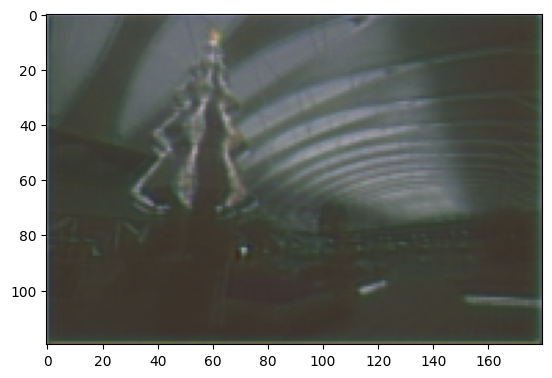

In [52]:
import matplotlib.pyplot as plt
# Assuming you have a tensor named 'image_tensor'
# First, convert the tensor to a NumPy array
image_array = pred[0][0].numpy()[0] # For PyTorch tensors
# For TensorFlow tensors, you can use: image_array = image_tensor.numpy()
image_array = image_array.transpose((1, 2, 0))
# Now, you can display the image using Matplotlib
plt.imshow(image_array)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


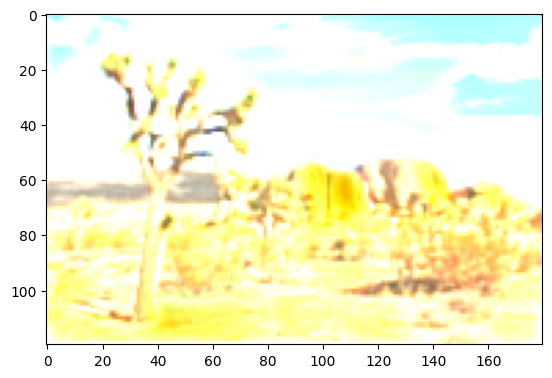

In [18]:
# Assuming you have a tensor named 'image_tensor'
# First, convert the tensor to a NumPy array
image_array = (img[0][1]+img[0][0]).numpy()[0] # For PyTorch tensors
# For TensorFlow tensors, you can use: image_array = image_tensor.numpy()
image_array = image_array.transpose((1, 2, 0))
# Now, you can display the image using Matplotlib
plt.imshow(image_array)
plt.show()

In [ ]:
# Assuming you have a tensor named 'image_tensor'
# First, convert the tensor to a NumPy array
image_array = img[0][1].numpy()[0] # For PyTorch tensors
# For TensorFlow tensors, you can use: image_array = image_tensor.numpy()
image_array = image_array.transpose((1, 2, 0))
# Now, you can display the image using Matplotlib
plt.imshow(image_array)
plt.show()